# Detecting peaks in signal and adjusting speaker delay

In [2]:
import librosa
import matplotlib
import numpy

audio_data = 'vrai_enregistrement.wav'
hop_length = 256

In [3]:
x, sr = librosa.load(audio_data, sr=44100) # Specify frequency of the source (here we used the maximum allowed on the Android device)

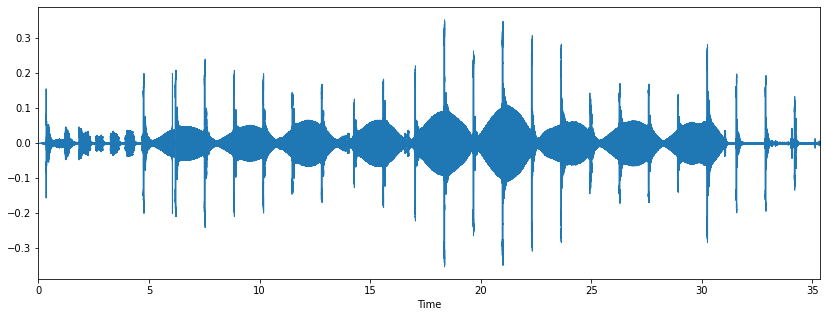

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [6]:
onset_envelope = librosa.onset.onset_strength(x, sr=sr, hop_length=hop_length)

N = len(x)
T = N/float(sr)
t = numpy.linspace(0, T, len(onset_envelope))

onset_frames = librosa.util.peak_pick(onset_envelope, 7, 7, 7, 7, 0.5, 5)
print('{} peaks detected'.format(len(onset_frames)))

87 peaks detected


(0.0, 14.472243118286134)

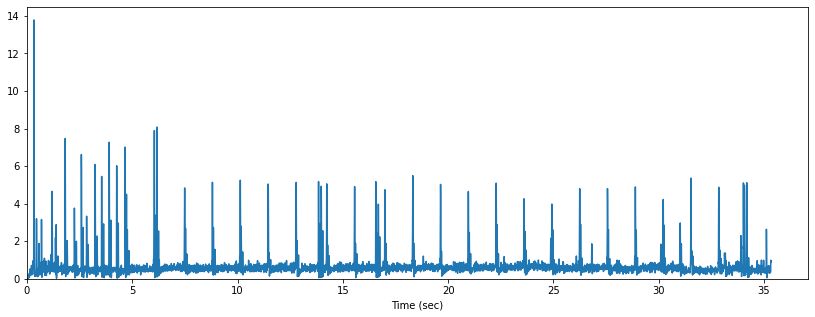

In [7]:
plt.figure(figsize=(14, 5))
plt.plot(t, onset_envelope)
plt.xlabel('Time (sec)')
plt.xlim(xmin=0)
plt.ylim(0)

(0.0, 14.472243118286134)

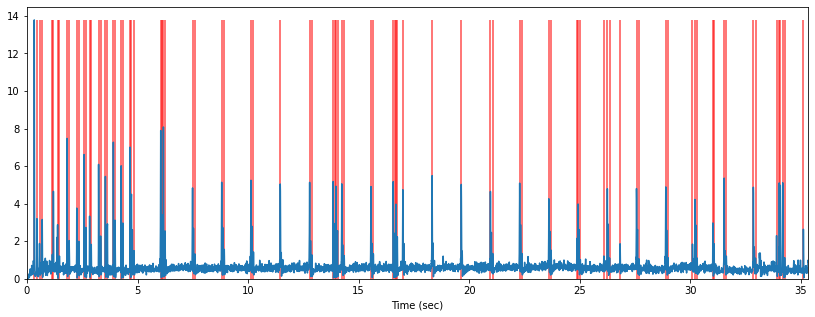

In [8]:
plt.figure(figsize=(14, 5))
plt.plot(t, onset_envelope)
plt.grid(False)
plt.vlines(t[onset_frames], 0, onset_envelope.max(), color='r', alpha=0.7)
plt.xlabel('Time (sec)')
plt.xlim(0, T)
plt.ylim(0)

In [9]:
first_peak = librosa.frames_to_time(onset_frames[0], sr=sr, hop_length=hop_length)
print("First peak is at {} ms with amplitude : ".format(first_peak, ))

First peak is at 0.3308843537414966 ms with amplitude : 


In [10]:
consecutive_delay = \
librosa.frames_to_time(onset_frames[1], sr=sr, hop_length=hop_length) - \
    librosa.frames_to_time(onset_frames[0], sr=sr, hop_length=hop_length)

print("Delay between first 2 peaks : {} ms".format(consecutive_delay))

Delay between first 2 peaks : 0.1219047619047619 ms


In [11]:
average = 0
for i in range(0, len(onset_frames)-1, 2):
    current_sample = librosa.frames_to_time(onset_frames[i],   sr=sr, hop_length=hop_length)
    next_sample    = librosa.frames_to_time(onset_frames[i+1], sr=sr, hop_length=hop_length)

    consecutive_delay = next_sample - current_sample
    average += consecutive_delay

    print("Delay between {}-{} peaks : {} s".format(i, i+1, consecutive_delay))

average = average / (len(onset_frames)/2)
print("Averaged : {} s".format(average))

Delay between 0-1 peaks : 0.1219047619047619 s
Delay between 2-3 peaks : 0.12190476190476196 s
Delay between 4-5 peaks : 0.04643990929705222 s
Delay between 6-7 peaks : 0.08126984126984116 s
Delay between 8-9 peaks : 0.09287981859410444 s
Delay between 10-11 peaks : 0.09287981859410444 s
Delay between 12-13 peaks : 0.08126984126984116 s
Delay between 14-15 peaks : 0.07546485260770996 s
Delay between 16-17 peaks : 0.09287981859410399 s
Delay between 18-19 peaks : 0.09287981859410444 s
Delay between 20-21 peaks : 0.07546485260770952 s
Delay between 22-23 peaks : 0.07546485260770908 s
Delay between 24-25 peaks : 0.06385487528344669 s
Delay between 26-27 peaks : 1.2074376417233559 s
Delay between 28-29 peaks : 0.04643990929705222 s
Delay between 30-31 peaks : 1.2422675736961448 s
Delay between 32-33 peaks : 1.2074376417233568 s
Delay between 34-35 peaks : 1.2074376417233559 s
Delay between 36-37 peaks : 1.213242630385487 s
Delay between 38-39 peaks : 0.1102947845804998 s
Delay between 40-4